# Task 1 - Prediction Using Supervised ML

### **Objective -**
Predict the percentage of an student based on the no. of study hours.

### Submitted By:- AKHILESH INGLE

## Simple Linear Regression

## Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset 

In [4]:
data = pd.read_csv('http://bit.ly/w-data')

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# Check Shape
data.shape

(25, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
# Check Missing Values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

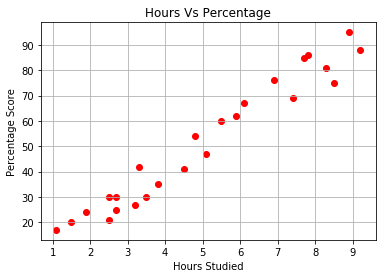

In [12]:
# Plotting the distribution of scores
plt.scatter(data  = data, x = 'Hours', y = 'Scores', color = 'red')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

### **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting Data into Train and Test Set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
X_train

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
Y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [16]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [17]:
Y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training Complete")

Training Complete


## Visualizing Training Data 

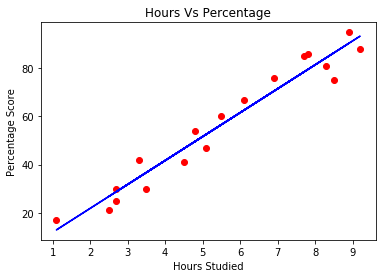

In [19]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours Vs Percentage")
plt.show()

## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
y_pred = regressor.predict(X_test)

## Predicting Score at 9.25 Hours

In [21]:
pred = regressor.predict([[9.25]])

In [22]:
print("Prediction =",pred[0])

Prediction = 93.89272889341655


### Comparing Predicted values with original values

In [23]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})

In [24]:
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visualizing Testing data

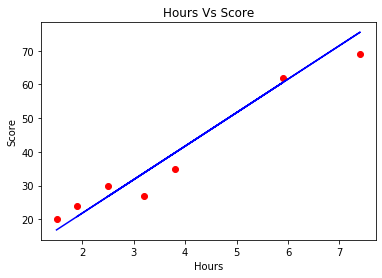

In [25]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hours Vs Score")
plt.show()

## Evaluating the Model

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

In [27]:
# Check Accuracy
score = r2_score(Y_test, y_pred)
print("Accuracy =", score*100)

Accuracy = 93.67661043365055


In [28]:
print("Mean Absolute Error =", mean_absolute_error(Y_test, y_pred))

Mean Absolute Error = 4.130879918502486
